In [45]:
import time
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

In [47]:
# Input connection string

host = "ec2-52-4-171-132.compute-1.amazonaws.com"
port = "5432"
database = "d2ajro4cjr10lb"
user = "whnpmxwsiccrtg"
password = "53c453893549d2b1e6a4ff92e626a2a08ebcaff66678e50d33e3742f66e3e4f4"

conn_string = f"postgres://(user):(password)@(host)/(database)"

In [34]:
# import csv file
listing_summary_df = pd.read_csv("./Resources/listings_summary.csv")
listing_summary_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.173151,-86.735813,Private room,40,1,561,2019-01-13,4.74,1,133
1,20847,East Nashville Retro Ranch!,79021,Kristina,NaN,District 7,36.196397,-86.704267,Private room,41,365,138,2018-10-23,1.28,2,0
2,25341,East Nashville Retro Ranch BR #2,79021,Kristina,NaN,District 7,36.197053,-86.704937,Private room,65,2,102,2018-12-30,0.97,2,270
3,25613,108 Year Old East Nashville Home,95811,Nell,NaN,District 6,36.178263,-86.741622,Private room,93,2,454,2019-01-07,4.27,1,303
4,37306,8th South Private Room&Bath - Female(s)/F+M Only,161033,Carly,NaN,District 17,36.133109,-86.774767,Private room,105,2,100,2018-11-11,0.97,1,69


In [35]:
listing_summary_df = listing_summary_df.drop(['id','name','host_name','neighbourhood_group','room_type','minimum_nights','last_review','calculated_host_listings_count','availability_365'], axis=1)
listing_summary_df.head()

,host_id,neighbourhood,latitude,longitude,price,number_of_reviews,reviews_per_month
0,12172,District 6,36.173151,-86.735813,40,561,4.74
1,79021,District 7,36.196397,-86.704267,41,138,1.28
2,79021,District 7,36.197053,-86.704937,65,102,0.97
3,95811,District 6,36.178263,-86.741622,93,454,4.27
4,161033,District 17,36.133109,-86.774767,105,100,0.97


In [37]:
# Perform to_sql test

db = create_engine(conn_string)
conn = db.connect()

start_time = time.time()
listing_summary_df.to_sql('to_sql_test', con=conn, if_exists='replace', index=False)
print("to_sql duration: {} seconds".format(time.time() - start_time))


          

to_sql duration: 202.72424578666687 seconds


In [38]:
# import csv file
listing_full_df = pd.read_csv("./Resources/listings_full.csv")
listing_full_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20190117134323,2019-01-17,Nashville Charm,"NOTE: For April and early May, must book at le...",1920 historic bungalow backs up to city park w...,"NOTE: For April and early May, must book at le...",none,Historic East Nashville is home to many new an...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,4.74
1,20847,https://www.airbnb.com/rooms/20847,20190117134323,2019-01-17,East Nashville Retro Ranch!,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...",...,f,f,strict_14_with_grace_period,t,t,2,0,2,0,1.28
2,25341,https://www.airbnb.com/rooms/25341,20190117134323,2019-01-17,East Nashville Retro Ranch BR #2,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...",...,f,f,strict_14_with_grace_period,t,t,2,0,2,0,0.97
3,25613,https://www.airbnb.com/rooms/25613,20190117134323,2019-01-17,108 Year Old East Nashville Home,"Lovely large Craftsman home. Art, architecture...","Our gorgeous 3,000 square foot, architecturall...","Lovely large Craftsman home. Art, architecture...",none,We live in a walkable neighborhood with sidewa...,...,t,f,moderate,t,t,1,0,1,0,4.27
4,37306,https://www.airbnb.com/rooms/37306,20190117134323,2019-01-17,8th South Private Room&Bath - Female(s)/F+M Only,Renting again after taking a 1.5 year break. P...,Thank you for considering my home for your Nas...,Renting again after taking a 1.5 year break. P...,none,"I'm in Woodland-in-Waverly, the oldest survivi...",...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.97


In [48]:
listing_full_df.count


<bound method DataFrame.count of             id                            listing_url       scrape_id  \
0         6422      https://www.airbnb.com/rooms/6422  20190117134323   
1        20847     https://www.airbnb.com/rooms/20847  20190117134323   
2        25341     https://www.airbnb.com/rooms/25341  20190117134323   
3        25613     https://www.airbnb.com/rooms/25613  20190117134323   
4        37306     https://www.airbnb.com/rooms/37306  20190117134323   
...        ...                                    ...             ...   
5993  31619362  https://www.airbnb.com/rooms/31619362  20190117134323   
5994  31625541  https://www.airbnb.com/rooms/31625541  20190117134323   
5995  31626380  https://www.airbnb.com/rooms/31626380  20190117134323   
5996  31626962  https://www.airbnb.com/rooms/31626962  20190117134323   
5997  31632611  https://www.airbnb.com/rooms/31632611  20190117134323   

     last_scraped                                              name  \
0      2019-01-17  

In [41]:
# import csv file
calendar_df = pd.read_csv("./Resources/calendar.csv")
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1885504,2019-01-17,f,$97.00,$61.00,3,30
1,1885504,2019-01-18,f,$135.00,$85.00,2,30
2,1885504,2019-01-19,f,$135.00,$85.00,2,30
3,1885504,2019-01-20,t,$97.00,$61.00,1,30
4,1885504,2019-01-21,t,$97.00,$61.00,1,30


In [49]:
calendar_df.count()

listing_id        2189270
date              2189270
available         2189270
price             2189270
adjusted_price    2189270
minimum_nights    2189270
maximum_nights    2189270
dtype: int64

In [44]:
db = create_engine(conn_string)
conn = db.connect()

start_time = time.time()
calendar_df.to_sql('calendar', con=conn, if_exists='replace', index=False)
print("to_sql duration: {} seconds".format(time.time() - start_time))


KeyboardInterrupt: 

In [57]:
import geopandas as gpd
district = gpd.read_file("./Resources/neighbourhoods.geojson")
district.head(50)
                        

,neighbourhood,neighbourhood_group,geometry
0,District 1,None,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,District 6,None,"MULTIPOLYGON (((-86.69743 36.20060, -86.69761 ..."
2,District 19,None,"MULTIPOLYGON (((-86.78203 36.18787, -86.78223 ..."
3,District 13,None,"MULTIPOLYGON (((-86.62522 36.15125, -86.62572 ..."
4,District 29,None,"MULTIPOLYGON (((-86.64001 36.12251, -86.63872 ..."
5,District 21,None,"MULTIPOLYGON (((-86.81236 36.18279, -86.81227 ..."
6,District 2,None,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
7,District 8,None,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ..."
8,District 31,None,"MULTIPOLYGON (((-86.67151 36.05272, -86.67033 ..."
9,District 32,None,"MULTIPOLYGON (((-86.63298 36.06901, -86.63265 ..."


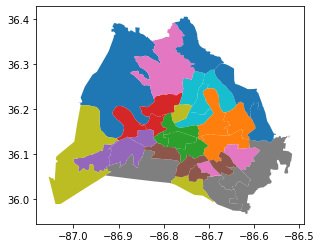

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

district.plot(column="neighbourhood", ax=ax)
              #legend=True, legend_kwds={'loc': 'right'})
                                                                